**INTRODUCTION**

---


Tahapan apa yang akan dilakukan

1) Import of Required Modules and importing (Reading) Data

2) Exploratory Data Analysis (EDA)

3) Handling missing data

4) Feature selection

5) Categorical data encoding

6) Data visualization

7) Machine Learning Logistic Regression

---



In [1]:
# get gdrive file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data analyst libraries
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

#baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# menghilangkan display max columns
pd.set_option("display.max_columns", None)
# transform
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data
df = pd.read_json('/content/drive/MyDrive/transactions.json', lines=True)



---


**EXPLORATORY DATA ANALYSIS (EDA)**


---



In [4]:
df.head(50)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,05,01,online_gifts,02/2021,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,550.82,,,,False,,,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,,US,05,01,rideshare,01/2026,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,560.62,,,,False,,,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,05,01,personal care,12/2031,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,808.61,,,,False,,,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,808.61,,,,True,,,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,05,01,personal care,04/2024,2014-08-03,2014-08-03,492,492,9184,REVERSAL,False,,820.15,,,,True,,,False


Terlihat pada table ada data yang kosong pada type data object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [6]:
df.shape

(641914, 29)

In [7]:
# replace empty cell into nan
df = df.replace('', np.nan)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [8]:
# convert boolean into int
df['isFraud'] = df['isFraud'].replace({True: 1, False: 0})
df['cardPresent'] = df['cardPresent'].replace({True: 1, False: 0})
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].replace({True: 1, False: 0})
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,NaN,0.00,NaN,NaN,NaN,0,NaN,NaN,0
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,NaN,111.33,NaN,NaN,NaN,0,NaN,NaN,0
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,NaN,136.08,NaN,NaN,NaN,0,NaN,NaN,0
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,NaN,323.48,NaN,NaN,NaN,0,NaN,NaN,0
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,NaN,550.82,NaN,NaN,NaN,0,NaN,NaN,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  object 
 10  posConditionCode          641627 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [10]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,0.0,641914.000000,0.0,0.0,0.0,641914.000000,0.0,0.0,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,557.199927,556.775160,4886.184043,0.017607,NaN,4044.382035,NaN,NaN,NaN,0.469628,NaN,NaN,0.001510
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,257.326204,257.402639,2859.053679,0.131517,NaN,5945.510224,NaN,NaN,NaN,0.499077,NaN,NaN,0.038824
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,0.000000,NaN,502.442500,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,0.000000,NaN,2151.860000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,0.000000,NaN,5005.890000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,1.000000,NaN,47496.500000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000


In [11]:
# checking nan
col=df.columns
check_nan = pd.DataFrame({'count': df.isnull().sum(), 'rate': df.isnull().sum()*100/len(df)})
check_null=check_nan.sort_values(by=['rate'],ascending=False)
round(check_null,2)

,count,rate
recurringAuthInd,641914,100.00
posOnPremises,641914,100.00
merchantZip,641914,100.00
merchantState,641914,100.00
merchantCity,641914,100.00
echoBuffer,641914,100.00
acqCountry,3913,0.61
posEntryMode,3345,0.52
merchantCountryCode,624,0.10
transactionType,589,0.09


In [12]:
# Delete columns that have no values at all 
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis = 1)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0


In [13]:
# deleting empty values
df = df.dropna()

In [14]:
#Checking Missing Value
col=df.columns
check_nan = pd.DataFrame({'count': df.isnull().sum(), 'rate': df.isnull().sum()*100/len(df)})
check_null=check_nan.sort_values(by=['rate'],ascending=False)
round(check_null,2)

,count,rate
accountNumber,0,0.0
currentExpDate,0,0.0
cardPresent,0,0.0
currentBalance,0,0.0
isFraud,0,0.0
transactionType,0,0.0
cardLast4Digits,0,0.0
enteredCVV,0,0.0
cardCVV,0,0.0
dateOfLastAddressChange,0,0.0


In [15]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
transactionDateTime,633846,627556,2016-02-12T23:43:55,3
merchantName,633846,2491,Lyft,24973
acqCountry,633846,4,US,628193
merchantCountryCode,633846,4,US,628201
posEntryMode,633846,5,05,253748
posConditionCode,633846,3,01,507891
merchantCategoryCode,633846,19,online_retail,159509
currentExpDate,633846,165,08/2020,4144
accountOpenDate,633846,1826,2015-12-11,10020
dateOfLastAddressChange,633846,2186,2016-07-20,3904


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
customerId,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
creditLimit,633846.0,1.069852e+04,1.146247e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,633846.0,6.652951e+03,9.229448e+03,-1.244930e+03,1.115890e+03,3.578050e+03,8.161843e+03,5.000000e+04
transactionAmount,633846.0,1.351906e+02,1.470953e+02,0.000000e+00,3.232000e+01,8.582000e+01,1.890500e+02,1.825250e+03
cardCVV,633846.0,5.571258e+02,2.573074e+02,1.000000e+02,3.340000e+02,5.810000e+02,7.610000e+02,9.980000e+02
enteredCVV,633846.0,5.566958e+02,2.573850e+02,1.000000e+00,3.330000e+02,5.795000e+02,7.610000e+02,9.980000e+02
cardLast4Digits,633846.0,4.885631e+03,2.859074e+03,0.000000e+00,2.362000e+03,4.873000e+03,7.267000e+03,9.998000e+03
isFraud,633846.0,1.718398e-02,1.299566e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
currentBalance,633846.0,4.045564e+03,5.946768e+03,0.000000e+00,5.034300e+02,2.153300e+03,5.006668e+03,4.749650e+04


In [17]:
df.shape

(633846, 23)

Missing value telah dihapus

In [18]:
# convert object to DateTime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu

In [19]:
# Create new variable 'matchingCVV' to see which transaction has matching cardCVV and enteredCVV
df['matchingCVV'] = np.where(df['cardCVV'] == df['enteredCVV'], True, False)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0,True


In [20]:
# Converting transaction date time into each properties (day, month, year) & Converting account date time into year
df['transactionMonth'] = df.transactionDateTime.dt.month_name()
df['transactionYear'] = df.transactionDateTime.dt.year
df['transactionDay'] = df.transactionDateTime.dt.day_name()
df['transactionHour'] = df.transactionDateTime.dt.hour
df['accountExpYear'] = df.currentExpDate.dt.year
df['accountOpenYear'] = df.accountOpenDate.dt.year
df['AddressChangeYear'] = df.dateOfLastAddressChange.dt.year
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV,transactionMonth,transactionYear,transactionDay,transactionHour,accountExpYear,accountOpenYear,AddressChangeYear
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0,True,January,2016,Friday,19,2020,2014,2014
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0,True,January,2016,Saturday,22,2023,2014,2014
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0,True,January,2016,Monday,13,2027,2014,2014
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0,True,January,2016,Monday,22,2029,2014,2014
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0,True,January,2016,Saturday,1,2024,2014,2014


In [21]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV,transactionMonth,transactionYear,transactionDay,transactionHour,accountExpYear,accountOpenYear,AddressChangeYear
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0,True,January,2016,Friday,19,2020,2014,2014
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0,True,January,2016,Saturday,22,2023,2014,2014
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0,True,January,2016,Monday,13,2027,2014,2014
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0,True,January,2016,Monday,22,2029,2014,2014
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0,True,January,2016,Saturday,1,2024,2014,2014


In [22]:
pd.DataFrame({'Dtype':df.dtypes,'Unique':df.nunique()})

,Dtype,Unique
accountNumber,int64,5000
customerId,int64,5000
creditLimit,int64,10
availableMoney,float64,446376
transactionDateTime,datetime64[ns],627556
transactionAmount,float64,62571
merchantName,object,2491
acqCountry,object,4
merchantCountryCode,object,4
posEntryMode,object,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu

In [24]:
# Check transactionAmount lost
transactionAmountlost=pd.DataFrame({'transactionAmount':df['transactionAmount'].describe(),'Non Fraud TransactionAmount':df[df.isFraud==0].transactionAmount.describe(),'Fraud TransactionAmount':df[df.isFraud==1].transactionAmount.describe()})
transactionAmountlost

,transactionAmount,Non Fraud TransactionAmount,Fraud TransactionAmount
count,633846.000000,622954.000000,10892.000000
mean,135.190636,133.488261,232.555754
std,147.095318,145.652814,190.123501
min,0.000000,0.000000,0.000000
25%,32.320000,31.820000,91.260000
50%,85.820000,84.410000,185.225000
75%,189.050000,186.520000,324.517500
max,1825.250000,1825.250000,1743.510000


Interpretasi:
1. Rata-rata dan standar deviasi transactionAmount lebih kecil daripada Fraud TransactionAmount.
1. Rata-rata jumlah transaksi penipuan sangat tinggi berarti jumlah kerugian dalam transaksi penipuan sangat tinggi.



---

**Visualization Data**

---



Text(0.5, 1.0, 'Distribusi Fraud transactionAmount')

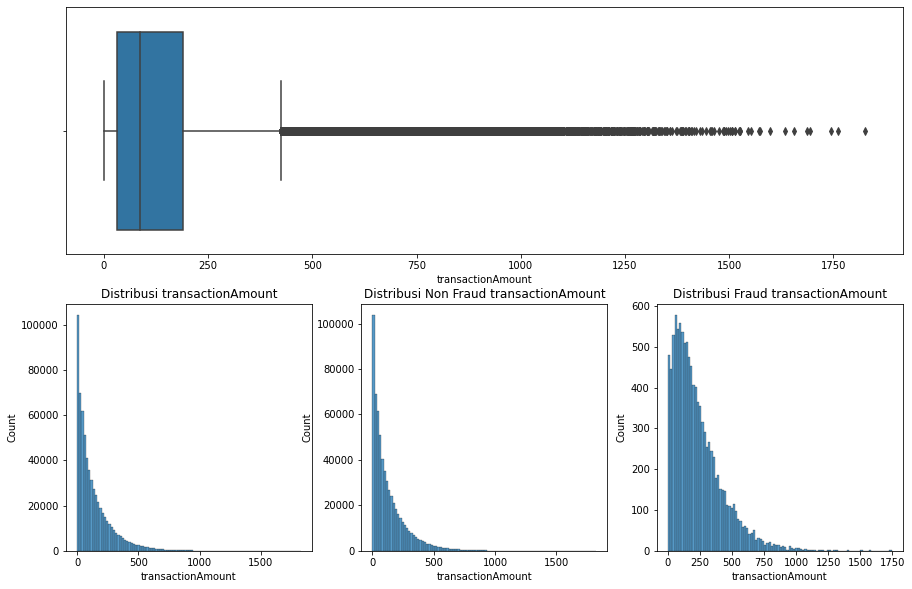

In [25]:
# Visualizatin distribution transactionAmount
fig = plt.subplots(figsize=(15,10))
sns.boxplot(df.transactionAmount, ax=plt.subplot(211))
sns.histplot(df.transactionAmount, bins=100, ax=plt.subplot(234)).set_title('Distribusi transactionAmount')
sns.histplot(df[df.isFraud==0].transactionAmount, bins=100, ax=plt.subplot(235)).set_title('Distribusi Non Fraud transactionAmount')
sns.histplot(df[df.isFraud==1].transactionAmount, bins=100, ax=plt.subplot(236)).set_title('Distribusi Fraud transactionAmount')

Interpretasi:
*   Dari boxplot dapat diketahui bahwa transactionAmount memiliki banyak outlier. Ini berarti varians transactionAmount dalam fitur sangat besar.
*   Distribusi pada transactionAmount dan distribusi nonFraud transactionAmount terlihat memiliki kemiringan yang sama. Akan tetapi, terlihat jelas bahwa Fraud transactionAmount terlihat memiliki perbedaan distribusi lebih dari yang lainnya walaupun kemiringannya sama ke kiri.

Kesimpulan:
1. Terlihat dari histogram, jumlah transaksi yang *fraud* memiliki distribusi yang merata dan transaksi *fraud* paling sering terjadi pada jumlah kecil.
2. Jumlah transaksi *fraud* yang dilakukan seringkali berkisar antara 100 hingga 500.
3. Dari sini dapat diketahui bahwa transaksi dengan jumlah kecil harus dipantau lebih jauh untuk mendeteksi dan mencegah penipuan kartu kredit.

In [26]:
# construction distribution
def cek_distribusi(col):
  transactioncount = df[[col,'transactionDateTime']].groupby([col]).count().reset_index()
  transactioncount.columns = [col,'Transaction count']
  dist_count = df[[col,'isFraud','transactionDateTime']].groupby([col,'isFraud']).count().reset_index()
  dist_count.columns = [col,'isFraud','count']
  dist_count = dist_count.merge(transactioncount[[col, 'Transaction count']], how='inner', on=col)
  dist_count['Percentage'] = (dist_count['count']/dist_count['Transaction count'])*100
  return dist_count.sort_values(by='isFraud',ascending=False)

def cek_distribusi_fraud(col):
  transactioncount = df[[col,'transactionDateTime']].groupby([col]).count().reset_index()
  transactioncount.columns = [col,'Transaction count']
  dist_count = df[[col,'isFraud','transactionDateTime']].groupby([col,'isFraud']).count().reset_index()
  dist_count.columns = [col,'isFraud','count']
  dist_count = dist_count.merge(transactioncount[[col, 'Transaction count']], how='inner', on=col)
  dist_count['Percentage'] = (dist_count['count']/dist_count['Transaction count'])*100
  return dist_count[dist_count['isFraud']==1].sort_values(by='Percentage',ascending=False).head(15)

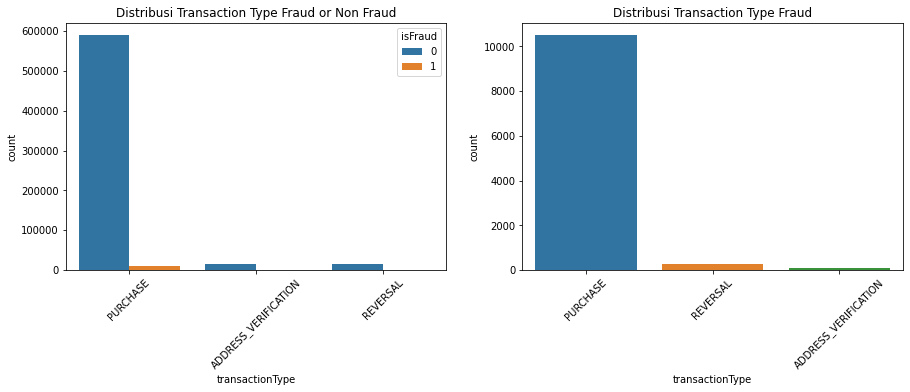

In [27]:
# transaction type fraud
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='transactionType', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('Distribusi Transaction Type Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].transactionType, data = df,ax=plt.subplot(222)).set_title('Distribusi Transaction Type Fraud')
plt.xticks(rotation=45)
plt.show()

In [28]:
cek_distribusi('transactionType')

,transactionType,isFraud,count,Transaction count,Percentage
1,ADDRESS_VERIFICATION,1,87,16298,0.533808
3,PURCHASE,1,10520,601556,1.748798
5,REVERSAL,1,285,15992,1.782141
0,ADDRESS_VERIFICATION,0,16211,16298,99.466192
2,PURCHASE,0,591036,601556,98.251202
4,REVERSAL,0,15707,15992,98.217859


Kesimpulan:
1. Data di atas menunjukkan bahwa transaksi dengan tipe pembelian (*purchase*) memiliki jumlah transaksi penipuan terbesar melakukan fraud.
2. Transaksi dengan tipe **Reversal** memiliki persentase yang lebih banyak dibandingkan pembelian, ini berarti jika perbandingan purchase dengan reversal sama, maka reversal akan memiliki jumlah fraud terbesar, jadi transaksi reversal harus diawasi.
3. Sedangkan transaksi dengan tipe verifikasi alamat (*address verification*) lebih kecil mengalami fraud dibandingkan tipe transaksi lainnya. Ini berarti transaksi yang menggunakan verifikasi alamat bisa menjadi solusi.


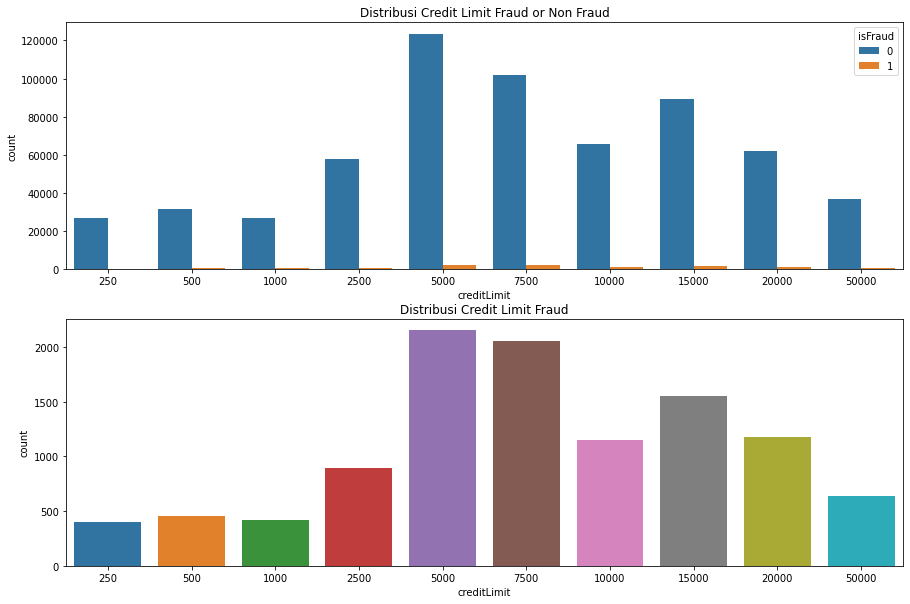

In [29]:
# credit limit fraud
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='creditLimit', hue='isFraud', data = df,ax=plt.subplot(211)).set_title('Distribusi Credit Limit Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].creditLimit, data = df,ax=plt.subplot(212)).set_title('Distribusi Credit Limit Fraud')
plt.show()

In [30]:
cek_distribusi('creditLimit')

,creditLimit,isFraud,count,Transaction count,Percentage
19,50000,1,640,37589,1.702626
13,10000,1,1146,66624,1.720101
3,500,1,454,32266,1.407054
17,20000,1,1180,63438,1.860084
5,1000,1,420,27479,1.528440
7,2500,1,897,58661,1.529125
15,15000,1,1554,90765,1.712114
9,5000,1,2149,125499,1.712364
1,250,1,397,27436,1.447004
11,7500,1,2055,104089,1.974272


Kesimpulan:
1. Dari data terlihat bahwa jumlah Fraud mulai sering dilakukan pada credit limit di atas 2500.
2. Yang terbesar adalah credit limit 5000 sering kali melakukan Fraud.
3. Limit 7500 juga memiliki presentase yang terbesar melakukan Fraud terhadap jumlah transaksi.
4. Dari data di atas bisa kita simpulkan untuk melakukan pengawasan lebih ketat terhadap credit limit berkisar antara 2500 di atas atau bisa kita kurangi maksimal credit limit menjadi sebesar 5000.

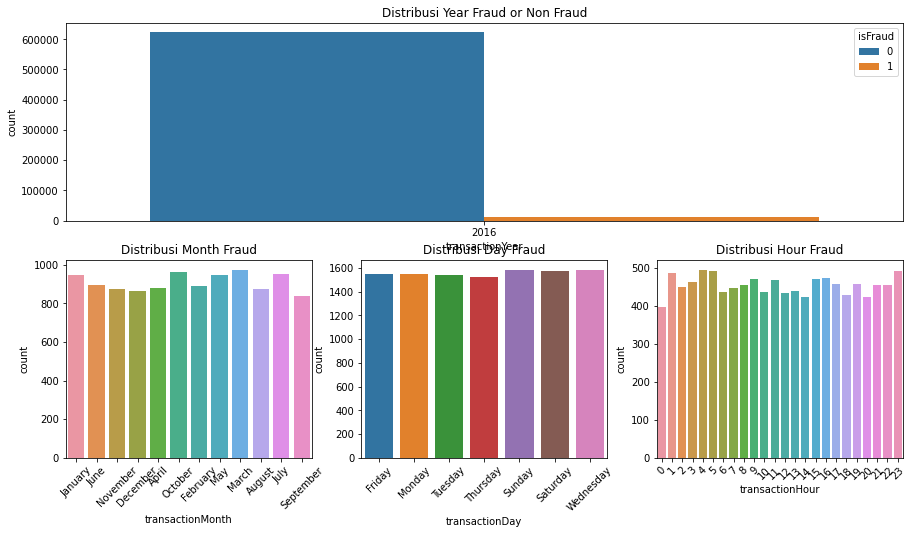

In [31]:
#Transaction date time
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='transactionYear', hue='isFraud', data = df,ax=plt.subplot(211)).set_title('Distribusi Year Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].transactionMonth, data = df,ax=plt.subplot(234)).set_title('Distribusi Month Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].transactionDay, data = df,ax=plt.subplot(235)).set_title('Distribusi Day Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].transactionHour, data = df,ax=plt.subplot(236)).set_title('Distribusi Hour Fraud')
plt.xticks(rotation=45)
plt.show()

In [32]:
cek_distribusi('transactionYear')

,transactionYear,isFraud,count,Transaction count,Percentage
1,2016,1,10892,633846,1.718398
0,2016,0,622954,633846,98.281602


In [33]:
cek_distribusi_fraud('transactionMonth')

,transactionMonth,isFraud,count,Transaction count,Percentage
9,January,1,949,49180,1.929646
15,March,1,975,51344,1.898956
7,February,1,888,47330,1.876188
17,May,1,946,52826,1.790785
1,April,1,880,50185,1.753512
11,July,1,950,54198,1.752832
13,June,1,893,52011,1.716944
21,October,1,960,56659,1.694347
3,August,1,874,54862,1.593088
19,November,1,875,55428,1.578625


In [34]:
cek_distribusi_fraud('transactionDay')

,transactionDay,isFraud,count,Transaction count,Percentage
7,Sunday,1,1585,90405,1.753222
5,Saturday,1,1569,89857,1.746108
13,Wednesday,1,1578,90600,1.741722
3,Monday,1,1550,90108,1.720158
11,Tuesday,1,1536,90084,1.705075
9,Thursday,1,1525,90600,1.683223
1,Friday,1,1549,92192,1.680189


In [35]:
cek_distribusi_fraud('transactionHour')

,transactionHour,isFraud,count,Transaction count,Percentage
9,4,1,495,26472,1.869900
47,23,1,492,26378,1.865191
11,5,1,492,26549,1.853177
3,1,1,485,26482,1.831433
23,11,1,467,26303,1.775463
19,9,1,470,26491,1.774187
33,16,1,474,26717,1.774151
31,15,1,470,26524,1.771980
7,3,1,463,26435,1.751466
45,22,1,455,26139,1.740694


Kesimpulan:
1. Terlihat pada transaksi bulanan yang dilakukan Fraud sering terjadi pada 7 tahun pertama.
2. Hari yang sering terjadi adalah Minggu ini dikarenakan hari libur meningkatnya orang melakukan transaksi.
3. Fraud yang dilakukan paling sering dilakukan sekitar jam 3 sore hingga 5 pagi, ini dikarenakan sudah pulangnya jam kerja sehingga tidak ada pengawasan transaksi yang dilakukan.
5. Saran yang bisa diberikan adalah lebih mengawasi pada 7 bulan pertama dari awal tahun, hari libur dan melakukan pengawasan lebih setelah jam 3 sore hingga 5 pagi.

In [36]:
# merchantName distribution
cek_distribusi_fraud('merchantName')

,merchantName,isFraud,count,Transaction count,Percentage
1397,Hyatt House #786719,1,18,92,19.565217
1391,Hyatt House #691218,1,19,106,17.924528
925,Fast Repair,1,90,515,17.475728
3701,Walgreens #856780,1,3,19,15.789474
1387,Hyatt House #686333,1,11,81,13.580247
2358,Powerlifting #95081,1,4,30,13.333333
1947,NYSC #746171,1,3,23,13.043478
1375,Hyatt House #524654,1,15,118,12.711864
1369,Hyatt House #461673,1,13,104,12.500000
1345,Hyatt House #107859,1,13,108,12.037037


Kesimpulan:
1. Dari data di atas distribusi fraud pada merchant paling tinggi sebesar 20%, akan tetapi bila terlihat frekuensi jumlah fraud pada Hyatt House banyak

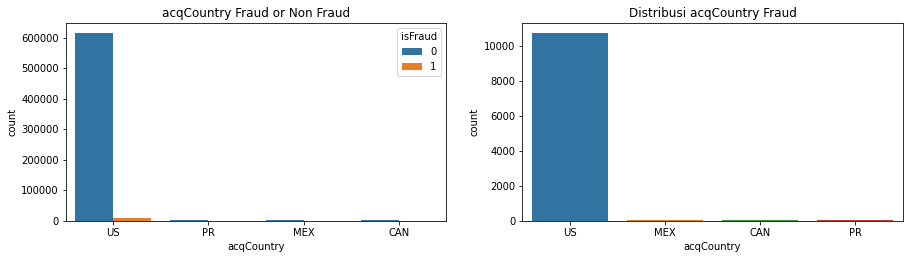

In [37]:
# acqCountry visualization
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='acqCountry', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('acqCountry Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].acqCountry, data = df,ax=plt.subplot(222)).set_title('Distribusi acqCountry Fraud')
plt.show()

In [38]:
cek_distribusi('acqCountry')

,acqCountry,isFraud,count,Transaction count,Percentage
1,CAN,1,49,1856,2.640086
3,MEX,1,58,2605,2.226488
5,PR,1,31,1192,2.600671
7,US,1,10754,628193,1.711894
0,CAN,0,1807,1856,97.359914
2,MEX,0,2547,2605,97.773512
4,PR,0,1161,1192,97.399329
6,US,0,617439,628193,98.288106


Kesimpulan:
1. Negara asal US memiliki 10 ribu transaksi yang fraud.
2. Negara US memiliki presentase terkecil dibandingkan negara lainnya.
3. Presentase di luar US lebih tinggi.
4. Lebih memberikan verifikasi kepada pembuat di luar US untuk mengurangi Fraud

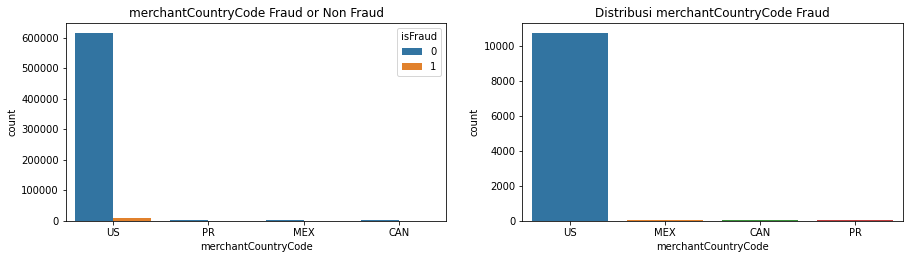

In [39]:
# merchantCountryCode visualization
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='merchantCountryCode', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('merchantCountryCode Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].merchantCountryCode, data = df,ax=plt.subplot(222)).set_title('Distribusi merchantCountryCode Fraud')
plt.show()

In [40]:
cek_distribusi('merchantCountryCode')

,merchantCountryCode,isFraud,count,Transaction count,Percentage
1,CAN,1,51,1850,2.756757
3,MEX,1,59,2604,2.265745
5,PR,1,31,1191,2.602855
7,US,1,10751,628201,1.711395
0,CAN,0,1799,1850,97.243243
2,MEX,0,2545,2604,97.734255
4,PR,0,1160,1191,97.397145
6,US,0,617450,628201,98.288605


Kesimpulan:
1. Terlihat pada data di atas menunjukkan bahwa tidak adanya perbedaan besar dengan pembuatan di negara asal, ini berarti tidak terlalu banyaknya transaksi luar negeri.

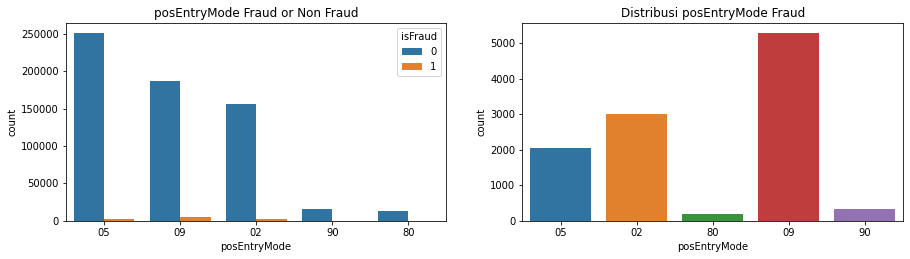

In [41]:
# posEntryMode visualization
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='posEntryMode', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('posEntryMode Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].posEntryMode, data = df,ax=plt.subplot(222)).set_title('Distribusi posEntryMode Fraud')
plt.show()

In [42]:
cek_distribusi('posEntryMode')

,posEntryMode,isFraud,count,Transaction count,Percentage
1,02,1,3017,159430,1.892367
3,05,1,2061,253748,0.812223
5,09,1,5303,191738,2.765753
7,80,1,186,12817,1.451198
9,90,1,325,16113,2.017005
0,02,0,156413,159430,98.107633
2,05,0,251687,253748,99.187777
4,09,0,186435,191738,97.234247
6,80,0,12631,12817,98.548802
8,90,0,15788,16113,97.982995


Kesimpulan:
1. Data di atas menunjukkan kode 05 memiliki transaksi yang besar dengan presentase Fraud nya kecil, ini menunjukkan bahwa code 05 (Integrated circuit reader) memiliki keamanan yang lebih baik karena dibutuhkannya kartu.

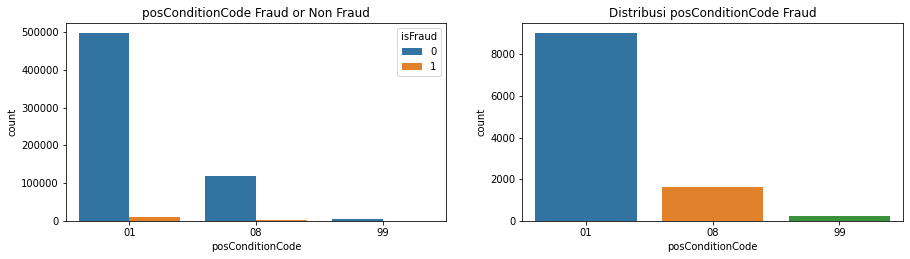

In [43]:
# posEntryMode visualization
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='posConditionCode', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('posConditionCode Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].posConditionCode, data = df,ax=plt.subplot(222)).set_title('Distribusi posConditionCode Fraud')
plt.show()

In [44]:
cek_distribusi('posConditionCode')

,posConditionCode,isFraud,count,Transaction count,Percentage
1,01,1,9047,507891,1.781288
3,08,1,1629,120035,1.357104
5,99,1,216,5920,3.648649
0,01,0,498844,507891,98.218712
2,08,0,118406,120035,98.642896
4,99,0,5704,5920,96.351351


Kesimpulan:
1. Data di atas menunjukkan kode 01 memiliki transaksi yang besar dengan presentase Fraud yang besar juga. Hal ini menunjukkan bahwa transaksi yang dilakukan 'Cardholder not present' memiliki resiko fraud yang besar.
2. kode 99 memiliki presentase yang cukup besar dibandingkan lainnya.

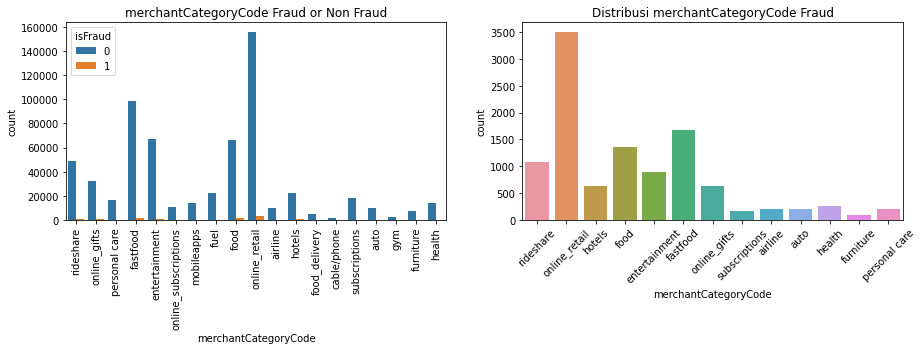

In [45]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='merchantCategoryCode', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('merchantCategoryCode Fraud or Non Fraud')
plt.xticks(rotation=90)
sns.countplot(x=df[df.isFraud==1].merchantCategoryCode, data = df,ax=plt.subplot(222)).set_title('Distribusi merchantCategoryCode Fraud')
plt.xticks(rotation=45)
plt.show()

In [46]:
cek_distribusi_fraud('merchantCategoryCode')

,merchantCategoryCode,isFraud,count,Transaction count,Percentage
19,hotels,1,623,22567,2.760668
24,online_retail,1,3505,159509,2.197368
29,rideshare,1,1086,49924,2.175306
3,auto,1,207,10008,2.068345
10,food,1,1355,67426,2.009611
1,airline,1,196,9853,1.989242
22,online_gifts,1,625,32645,1.914535
17,health,1,266,14167,1.877603
8,fastfood,1,1668,99943,1.668951
6,entertainment,1,900,68254,1.318604


Kesimpulan:
1. Transaksi lebih sering dilakukan pada retail online.
2. Retail online merupakan presentase *fraud* terbesar kedua setelah hotel.
3. Hotel memiliki presentase *fraud* terbesar.

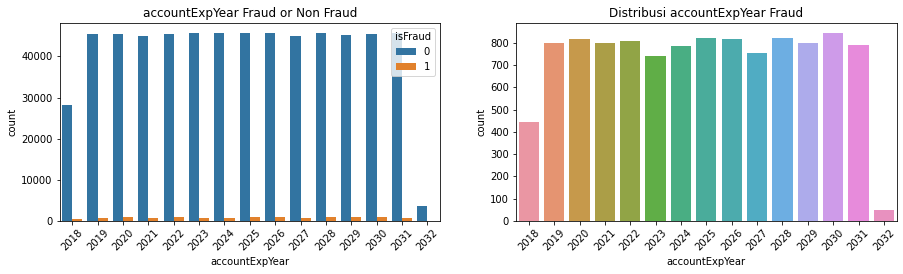

In [47]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='accountExpYear', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('accountExpYear Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].accountExpYear, data = df,ax=plt.subplot(222)).set_title('Distribusi accountExpYear Fraud')
plt.xticks(rotation=45)
plt.show()

In [48]:
cek_distribusi_fraud('accountExpYear')

,accountExpYear,isFraud,count,Transaction count,Percentage
25,2030,1,846,46394,1.823512
21,2028,1,822,46440,1.770026
15,2025,1,822,46634,1.762662
5,2020,1,816,46339,1.760936
17,2026,1,818,46544,1.757477
9,2022,1,806,46144,1.746706
23,2029,1,800,45910,1.742540
7,2021,1,798,45810,1.741978
3,2019,1,798,46357,1.721423
27,2031,1,789,46393,1.700688


Kesimpulan:
1. Distribusi dari tahun exp date hampir sama, jadi bisa dikatakan exp date tidak mempengaruhi fraud.

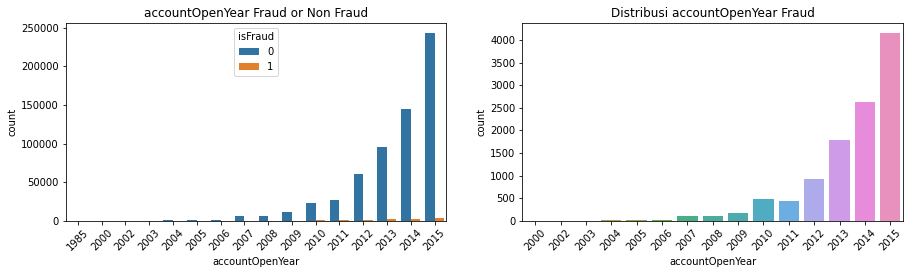

In [49]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='accountOpenYear', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('accountOpenYear Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].accountOpenYear, data = df,ax=plt.subplot(222)).set_title('Distribusi accountOpenYear Fraud')
plt.xticks(rotation=45)
plt.show()

In [50]:
cek_distribusi_fraud('accountOpenYear')

,accountOpenYear,isFraud,count,Transaction count,Percentage
4,2002,1,1,22,4.545455
2,2000,1,3,149,2.013423
20,2010,1,483,24120,2.002488
26,2013,1,1796,96967,1.852177
14,2007,1,106,5914,1.792357
28,2014,1,2622,147962,1.772077
8,2004,1,28,1608,1.741294
30,2015,1,4164,247994,1.679073
22,2011,1,437,26889,1.625200
18,2009,1,181,11155,1.622591


Kesimpulan:
1. Distribusi dari tahun account open date dari histogram terlihat bahwa semakin baru pembuatan maka resiko dari fraud juga tinggi.
2. Untuk mengurangi fraud yang dilakukan, bisa dilakukan sosialisasi kepada pemegang credit card agar bisa mencegah fraud, dan mengawasi transaksi dari credit card yang baru.

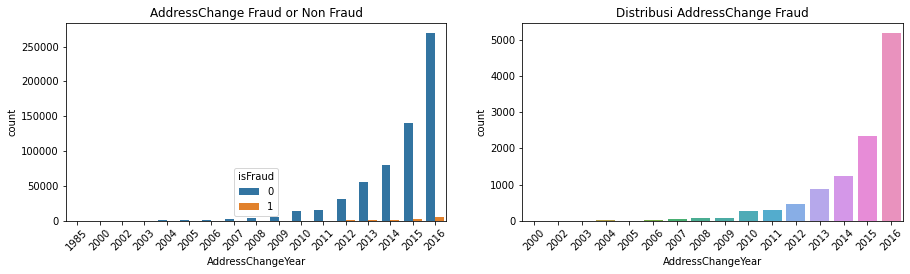

In [51]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='AddressChangeYear', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('AddressChange Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].AddressChangeYear, data = df,ax=plt.subplot(222)).set_title('Distribusi AddressChange Fraud')
plt.xticks(rotation=45)
plt.show()

In [52]:
cek_distribusi_fraud('accountOpenYear')

,accountOpenYear,isFraud,count,Transaction count,Percentage
4,2002,1,1,22,4.545455
2,2000,1,3,149,2.013423
20,2010,1,483,24120,2.002488
26,2013,1,1796,96967,1.852177
14,2007,1,106,5914,1.792357
28,2014,1,2622,147962,1.772077
8,2004,1,28,1608,1.741294
30,2015,1,4164,247994,1.679073
22,2011,1,437,26889,1.625200
18,2009,1,181,11155,1.622591


Kesimpulan:
1. Distribusi dari tahun penggantian alamat dari histogram terlihat bahwa semakin baru diganti maka resiko dari fraud juga tinggi.
2. Untuk mengurangi fraud yang dilakukan, bisa dilakukan untuk melakukan verifikasi alamat oleh pemegang credit card agar bisa mencegah fraud.

Text(0.5, 1.0, 'Distribusi Fraud currentBalance')

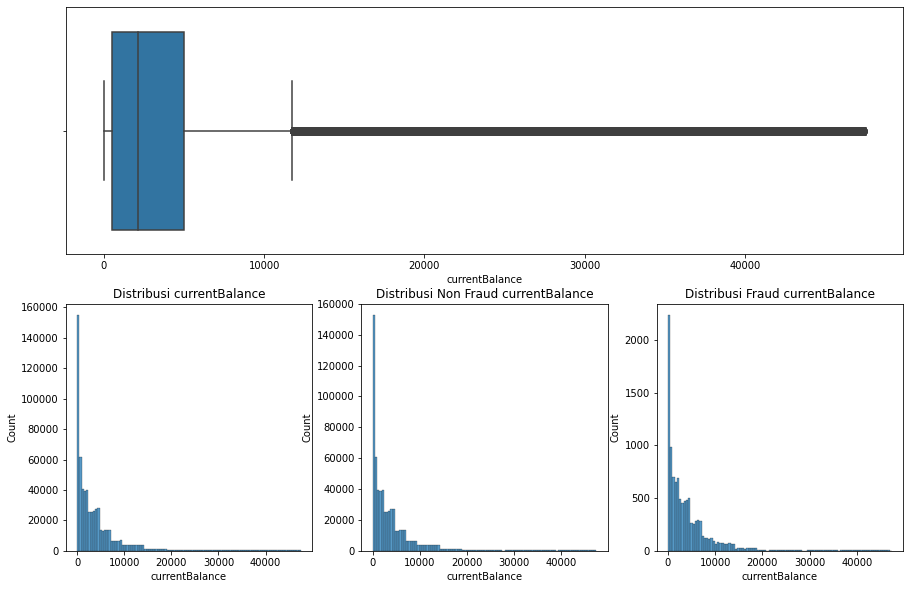

In [53]:
# Visualizatin distribution currentBalance
fig = plt.subplots(figsize=(15,10))
sns.boxplot(df.currentBalance, ax=plt.subplot(211))
sns.histplot(df.currentBalance, bins=100, ax=plt.subplot(234)).set_title('Distribusi currentBalance')
sns.histplot(df[df.isFraud==0].currentBalance, bins=100, ax=plt.subplot(235)).set_title('Distribusi Non Fraud currentBalance')
sns.histplot(df[df.isFraud==1].currentBalance, bins=100, ax=plt.subplot(236)).set_title('Distribusi Fraud currentBalance')

Kesimpulan:
1. Distribusi dari tahun current balance dengan current balance yang tidak fraud sama
2. Sedangkan current balance yang melakukan Fraud memiliki distribusi yang tidak beda jauh dibandingkan yang tidak fraud.

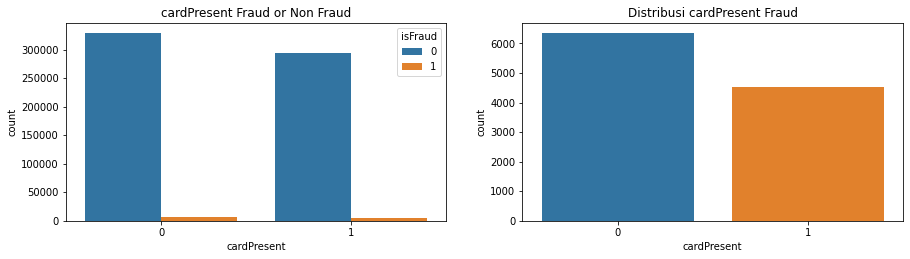

In [54]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='cardPresent', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('cardPresent Fraud or Non Fraud')
sns.countplot(x=df[df.isFraud==1].cardPresent, data = df,ax=plt.subplot(222)).set_title('Distribusi cardPresent Fraud')
plt.show()

In [55]:
cek_distribusi('cardPresent')

,cardPresent,isFraud,count,Transaction count,Percentage
1,0,1,6370,336201,1.89470
3,1,1,4522,297645,1.51926
0,0,0,329831,336201,98.10530
2,1,0,293123,297645,98.48074


Kesimpulan:
1. Distribusi yang terlihat menunjukkan keberadaan kartu memiliki fraud yang lebih rendah.

In [56]:
df['matchingCVV'] = df['matchingCVV'].replace({True: 1, False: 0})

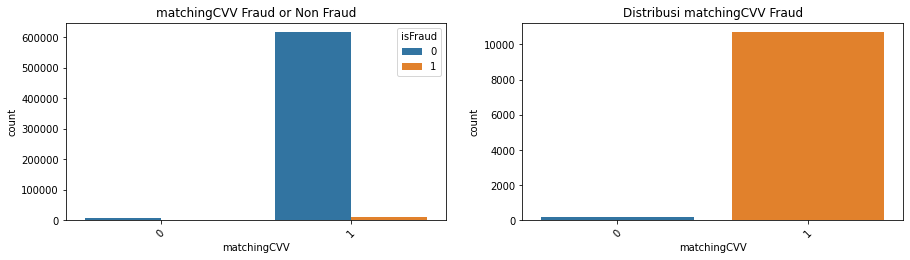

In [57]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='matchingCVV', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('matchingCVV Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].matchingCVV, data = df,ax=plt.subplot(222)).set_title('Distribusi matchingCVV Fraud')
plt.xticks(rotation=45)
plt.show()

In [58]:
cek_distribusi('matchingCVV')

,matchingCVV,isFraud,count,Transaction count,Percentage
1,0,1,188,5870,3.202726
3,1,1,10704,627976,1.704524
0,0,0,5682,5870,96.797274
2,1,0,617272,627976,98.295476


In [59]:
df['expirationDateKeyInMatch'].unique()

array([0, 1])

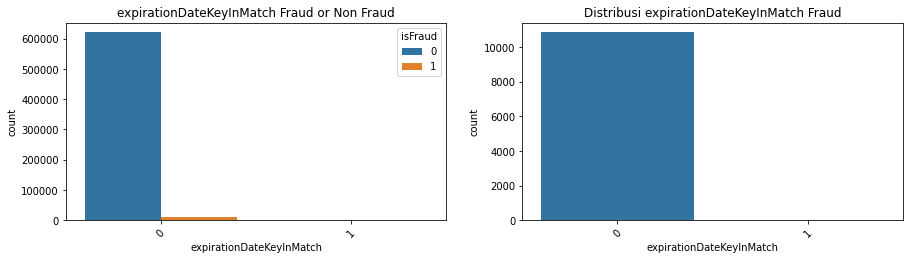

In [60]:
fig = plt.subplots(figsize=(15,8))
sns.countplot(x='expirationDateKeyInMatch', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('expirationDateKeyInMatch Fraud or Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].expirationDateKeyInMatch, data = df,ax=plt.subplot(222)).set_title('Distribusi expirationDateKeyInMatch Fraud')
plt.xticks(rotation=45)
plt.show()

In [61]:
cek_distribusi('expirationDateKeyInMatch')

,expirationDateKeyInMatch,isFraud,count,Transaction count,Percentage
1,0,1,10879,632885,1.718954
3,1,1,13,961,1.352758
0,0,0,622006,632885,98.281046
2,1,0,948,961,98.647242


In [62]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'matchingCVV', 'transactionMonth',
       'transactionYear', 'transactionDay', 'transactionHour',
       'accountExpYear', 'accountOpenYear', 'AddressChangeYear'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu



---

**Building Model**

---



In [64]:
# check the percentage of fraud in the dataset
100*df.isFraud.value_counts(normalize=True)

0    98.281602
1     1.718398
Name: isFraud, dtype: float64

**Data Encoding**

In [65]:
df['cardPresent'] = labelencoder.fit_transform(df['cardPresent'])
df['expirationDateKeyInMatch'] = labelencoder.fit_transform(df['expirationDateKeyInMatch'])
df['matchingCVV'] = labelencoder.fit_transform(df['matchingCVV'])
df['transactionType'] = labelencoder.fit_transform(df['transactionType'])
df['posConditionCode'] = labelencoder.fit_transform(df['posConditionCode'])
df['acqCountry'] = labelencoder.fit_transform(df['acqCountry'])
df['merchantCountryCode'] = labelencoder.fit_transform(df['merchantCountryCode'])
df['merchantCategoryCode'] = labelencoder.fit_transform(df['merchantCategoryCode'])
df['posEntryMode'] = labelencoder.fit_transform(df['posEntryMode'])
df['transactionDay'] = labelencoder.fit_transform(df['transactionDay'])
df['transactionMonth'] = labelencoder.fit_transform(df['transactionMonth'])
df['merchantName'] = labelencoder.fit_transform(df['merchantName'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  int64         
 7   acqCountry                633846 non-null  int64         
 8   merchantCountryCode       633846 non-null  int64         
 9   posEntryMode              633846 non-null  int64         
 10  posConditionCode          633846 non-null  int64         
 11  merchantCategoryCode      633846 non-null  int64         
 12  cu

In [67]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV,transactionMonth,transactionYear,transactionDay,transactionHour,accountExpYear,accountOpenYear,AddressChangeYear
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,1065,3,3,1,0,17,2020-04-01,2014-08-03,2014-08-03,492,492,9184,1,1,0.00,0,0,1,4,2016,0,19,2020,2014,2014
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,2084,3,3,2,0,17,2023-06-01,2014-08-03,2014-08-03,492,492,9184,1,0,111.33,0,0,1,4,2016,2,22,2023,2014,2014
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,1065,3,3,1,0,17,2027-12-01,2014-08-03,2014-08-03,492,492,9184,1,0,136.08,0,0,1,4,2016,1,13,2027,2014,2014
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,1065,3,3,0,0,17,2029-09-01,2014-08-03,2014-08-03,492,492,9184,1,1,323.48,0,0,1,4,2016,1,22,2029,2014,2014
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,1065,3,3,0,0,17,2024-10-01,2014-08-03,2014-08-03,492,492,9184,0,0,550.82,0,0,1,4,2016,2,1,2024,2014,2014


In [68]:
df = df.drop(['accountNumber','customerId','transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange','transactionYear','cardCVV','enteredCVV'], axis=1)

In [69]:
df.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV,transactionMonth,transactionDay,transactionHour,accountExpYear,accountOpenYear,AddressChangeYear
0,5000,5000.00,111.33,1065,3,3,1,0,17,9184,1,1,0.00,0,0,1,4,0,19,2020,2014,2014
1,5000,4888.67,24.75,2084,3,3,2,0,17,9184,1,0,111.33,0,0,1,4,2,22,2023,2014,2014
2,5000,4863.92,187.40,1065,3,3,1,0,17,9184,1,0,136.08,0,0,1,4,1,13,2027,2014,2014
3,5000,4676.52,227.34,1065,3,3,0,0,17,9184,1,1,323.48,0,0,1,4,1,22,2029,2014,2014
4,5000,4449.18,0.00,1065,3,3,0,0,17,9184,0,0,550.82,0,0,1,4,2,1,2024,2014,2014


In [70]:
df.dtypes

creditLimit                   int64
availableMoney              float64
transactionAmount           float64
merchantName                  int64
acqCountry                    int64
merchantCountryCode           int64
posEntryMode                  int64
posConditionCode              int64
merchantCategoryCode          int64
cardLast4Digits               int64
transactionType               int64
isFraud                       int64
currentBalance              float64
cardPresent                   int64
expirationDateKeyInMatch      int64
matchingCVV                   int64
transactionMonth              int64
transactionDay                int64
transactionHour               int64
accountExpYear                int64
accountOpenYear               int64
AddressChangeYear             int64
dtype: object

**CORRELATION**

In [71]:
df_corr=df.corr()

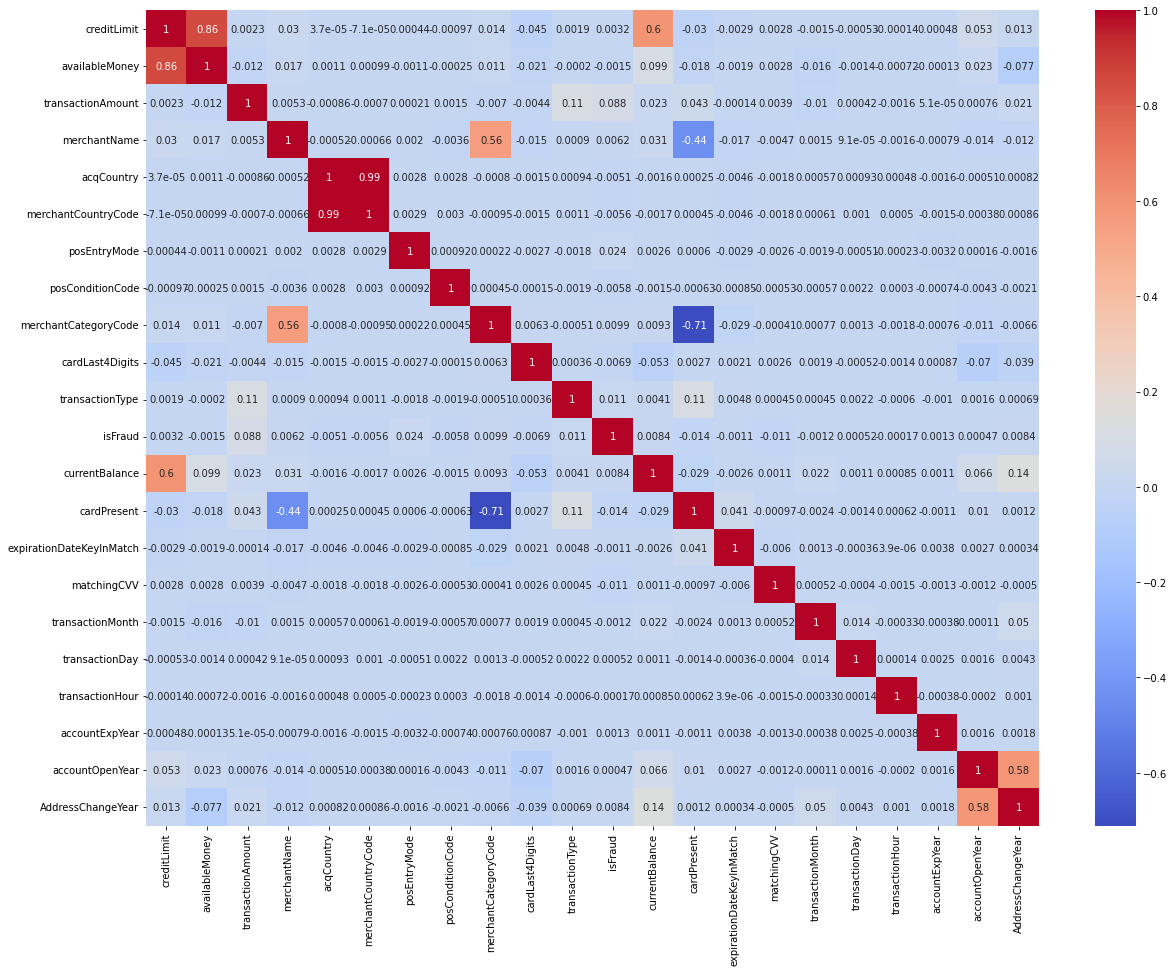

In [72]:
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(df_corr, cmap="coolwarm", annot=True)
plt.show()

In [73]:
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [74]:
corr_features = correlation(df,0.85)
corr_features

{'availableMoney', 'merchantCountryCode'}

In [75]:
df = df.drop(['availableMoney','merchantCountryCode'], axis=1)

In [76]:
len(df_corr.columns)

22

In [77]:
df_corr.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardLast4Digits', 'transactionType', 'isFraud',
       'currentBalance', 'cardPresent', 'expirationDateKeyInMatch',
       'matchingCVV', 'transactionMonth', 'transactionDay', 'transactionHour',
       'accountExpYear', 'accountOpenYear', 'AddressChangeYear'],
      dtype='object')

**Logistic Regression**

In [78]:
# split data
X = df.drop(columns=['isFraud'])
Y = df['isFraud']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [80]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
print('Y_train_pred: ',Y_train_pred)
Y_test_pred = model.predict(X_test)
print('Y_test_pred: ', Y_test_pred)

Y_train_pred:  [0 0 0 ... 0 0 0]
Y_test_pred:  [0 0 0 ... 0 0 0]


In [81]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(Y_test,Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test,Y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.0,0.0


In [82]:
  # Count non fraud and fraud transactions
non_fraud_count, fraud_count = df.isFraud.value_counts()
print(non_fraud_count)
print(fraud_count)

# Since the data is highly unbalanced between the fraud and non fraud transactions, then we should undersampling the data

622954
10892


In [83]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = Y_test.copy()

test_output.value_counts(normalize=True)

0    0.982961
1    0.017039
Name: isFraud, dtype: float64

In [84]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_resample(X_train,Y_train)

Y_rus.value_counts()

0    8732
1    8732
Name: isFraud, dtype: int64

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=42, stratify=Y_rus)

In [86]:
Y_train.value_counts()

1    6112
0    6112
Name: isFraud, dtype: int64

In [87]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_train_pred

array([1, 1, 0, ..., 1, 0, 0])

In [88]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [89]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    124610
           1       0.03      0.53      0.06      2160

    accuracy                           0.72    126770
   macro avg       0.51      0.63      0.45    126770
weighted avg       0.97      0.72      0.82    126770



In [90]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778


In [91]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(X_train,Y_train)

Y_ros.value_counts()

1    6112
0    6112
Name: isFraud, dtype: int64

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=42, stratify=Y_ros)

In [93]:
Y_train.value_counts()

0    4278
1    4278
Name: isFraud, dtype: int64

In [94]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_train_pred

array([0, 0, 1, ..., 0, 0, 1])

In [95]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [96]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    124610
           1       0.03      0.52      0.06      2160

    accuracy                           0.73    126770
   macro avg       0.51      0.63      0.45    126770
weighted avg       0.97      0.73      0.83    126770



In [97]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296


**Decision Trees**

In [98]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

print(classification_report(Y_test, Y_test_pred))

#evaluating the model
model_name = 'Decision Tree - without balancing'
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

acc_score = accuracy_score(Y_test, Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test, Y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    186832
           1       0.40      0.02      0.05      3322

    accuracy                           0.98    190154
   macro avg       0.69      0.51      0.52    190154
weighted avg       0.97      0.98      0.97    190154



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684


In [99]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - Random Under Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    124610
           1       0.03      0.66      0.06      2160

    accuracy                           0.66    126770
   macro avg       0.51      0.66      0.43    126770
weighted avg       0.97      0.66      0.78    126770



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684
4,Decision Tree - Random Under Sampling,0.770288,0.662214,0.662822,0.781970,0.032894,0.661574


In [100]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - Random Over Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.99      0.61      0.76    124610
           1       0.03      0.67      0.06      2160

    accuracy                           0.61    126770
   macro avg       0.51      0.64      0.41    126770
weighted avg       0.97      0.61      0.75    126770



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684
4,Decision Tree - Random Under Sampling,0.770288,0.662214,0.662822,0.781970,0.032894,0.661574
5,Decision Tree - Random Over Sampling,0.788686,0.634406,0.614073,0.745514,0.029139,0.669907


**Random Forest**

In [101]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

y_test_pred = model.predict(X_test)

print(classification_report(Y_test, Y_test_pred))

#evaluating the model
model_name = 'Random Forest - without balancing'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(Y_test, Y_test_pred)
f_score = f1_score(Y_test, Y_test_pred, average='weighted')
precision = precision_score(Y_test, Y_test_pred)
recall = metrics.recall_score(Y_test, Y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    186832
           1       0.40      0.02      0.05      3322

    accuracy                           0.98    190154
   macro avg       0.69      0.51      0.52    190154
weighted avg       0.97      0.98      0.97    190154



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684
4,Decision Tree - Random Under Sampling,0.770288,0.662214,0.662822,0.781970,0.032894,0.661574
5,Decision Tree - Random Over Sampling,0.788686,0.634406,0.614073,0.745514,0.029139,0.669907
6,Random Forest - without balancing,0.999957,0.983161,0.982309,0.974570,0.398058,0.024684


In [102]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_rus,Y_rus, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.99      0.69      0.82    124610
           1       0.04      0.71      0.07      2160

    accuracy                           0.69    126770
   macro avg       0.52      0.70      0.44    126770
weighted avg       0.98      0.69      0.80    126770



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684
4,Decision Tree - Random Under Sampling,0.770288,0.662214,0.662822,0.781970,0.032894,0.661574
5,Decision Tree - Random Over Sampling,0.788686,0.634406,0.614073,0.745514,0.029139,0.669907
6,Random Forest - without balancing,0.999957,0.983161,0.982309,0.974570,0.398058,0.024684
7,Random Forest - Random Under Sampling,1.000000,0.696756,0.693303,0.803581,0.038740,0.713889


In [103]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train, Y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       0.99      0.69      0.81    124610
           1       0.04      0.69      0.07      2160

    accuracy                           0.69    126770
   macro avg       0.51      0.69      0.44    126770
weighted avg       0.98      0.69      0.80    126770



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.982774,0.982945,0.982945,0.974507,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.628599,0.633397,0.722955,0.824276,0.032349,0.527778
2,Logistic Regression - Random Over Sampling,0.623890,0.636587,0.726229,0.826486,0.032358,0.521296
3,Decision Tree - without balancing,0.983759,0.982309,0.982309,0.974570,0.398058,0.024684
4,Decision Tree - Random Under Sampling,0.770288,0.662214,0.662822,0.781970,0.032894,0.661574
5,Decision Tree - Random Over Sampling,0.788686,0.634406,0.614073,0.745514,0.029139,0.669907
6,Random Forest - without balancing,0.999957,0.983161,0.982309,0.974570,0.398058,0.024684
7,Random Forest - Random Under Sampling,1.000000,0.696756,0.693303,0.803581,0.038740,0.713889
8,Random Forest - Random Over Sampling,1.000000,0.696020,0.687663,0.799659,0.037051,0.693519
